# Using deep features to train an image classifier

In [11]:
import turicreate
import matplotlib.pyplot as plt
import numpy as np

# Load some data

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # None means no limit
image_train = turicreate.SFrame('Code1/image_train_data/')
image_test = turicreate.SFrame('Code1/image_test_data/')

# Explore this image data

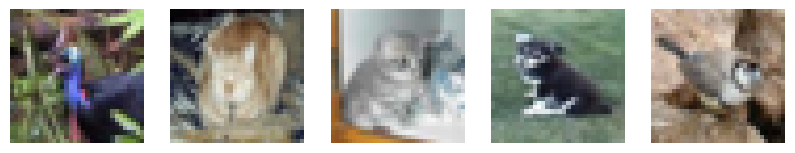

In [26]:
# explore() and show() deprecado por causa da versão do Pandas
images_train_show = image_train['image']

# Limitar o número de imagens a serem exibidas para evitar erros de espaço na grade
plt.figure(figsize=(10, 5))

for i, img in enumerate(images_train_show[:5]):
    # Convertendo a imagem para um array NumPy, se necessário
    if isinstance(img, turicreate.Image):
        img = np.array(img.pixel_data)
    
    plt.subplot(1, 5, i+1)  # Exibe até 5 imagens
    plt.imshow(img)
    plt.axis('off')  # Remover eixos

plt.show()

# Train an image classifier on raw image pixels

In [14]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.028855  | 0.319141     | 0.316176          | 0.336634            |

| 1         | 10       | 2.452715  | 0.714833     | 0.420168          | 0.386139            |

| 2         | 11       | 2.452715  | 0.899256     | 0.423319          | 0.366337            |

| 3         | 18       | 0.346324  | 1.438315     | 0.449580          | 0.386139            |

| 4         | 25       | 6.469101  | 1.977430     | 0.449580          | 0.405941            |

| 9         | 31       | 1.570928  | 2.729960     | 0.552521          | 0.544554            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model

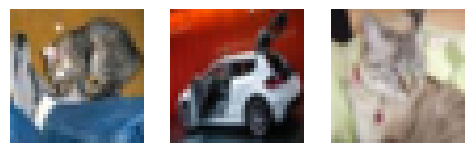

In [15]:
image_test_show = image_test[0:3]['image']
# Limitar o número de imagens a serem exibidas para evitar erros de espaço na grade
plt.figure(figsize=(10, 5))

for i, img in enumerate(image_test_show[:5]):
    # Convertendo a imagem para um array NumPy, se necessário
    if isinstance(img, turicreate.Image):
        img = np.array(img.pixel_data)
    
    plt.subplot(1, 5, i+1)  # Exibe até 5 imagens
    plt.imshow(img)
    plt.axis('off')  # Remover eixos

plt.show()

In [16]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [17]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [18]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.49175,
 'auc': 0.7382932083333329,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   75  |
 |     dog      |       bird      |  223  |
 |     cat      |    automobile   |  122  |
 |     cat      |       cat       |  344  |
 |     cat      |       dog       |  368  |
 |     dog      |       dog       |  477  |
 |     bird     |    automobile   |  113  |
 |  automobile  |    automobile   |  632  |
 |     bird     |       cat       |  189  |
 |     dog      |       cat       |  225  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.49235496583642,
 'log_loss': 1.1748585888246361,
 'precision'

# Train image classifier using deep features

In [19]:
len(image_train)

2005

In [20]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [21]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Given the deep features, train a logistic classifier

In [22]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.588971     | 0.743697          | 0.811881            |

| 1         | 6        | 0.250000  | 1.185503     | 0.755777          | 0.801980            |

| 2         | 13       | 3.230511  | 2.191724     | 0.783088          | 0.772277            |

| 3         | 15       | 3.203560  | 2.808473     | 0.204832          | 0.237624            |

| 4         | 17       | 1.000000  | 3.259675     | 0.783613          | 0.811881            |

| 9         | 25       | 1.000000  | 5.300766     | 0.928046          | 0.801980            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images

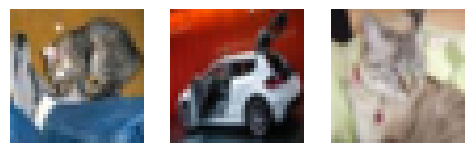

In [23]:
image_test_show = image_test[0:3]['image']

# Limitar o número de imagens a serem exibidas para evitar erros de espaço na grade
plt.figure(figsize=(10, 5))

for i, img in enumerate(image_test_show[:5]):
    # Convertendo a imagem para um array NumPy, se necessário
    if isinstance(img, turicreate.Image):
        img = np.array(img.pixel_data)
    
    plt.subplot(1, 5, i+1)  # Exibe até 5 imagens
    plt.imshow(img)
    plt.axis('off')  # Remover eixos

plt.show()

In [27]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [28]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79175,
 'auc': 0.9385183749999993,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       cat       |  129  |
 |     bird     |       dog       |   53  |
 |     dog      |       cat       |  198  |
 |  automobile  |       cat       |   22  |
 |     cat      |       bird      |   79  |
 |  automobile  |       dog       |   9   |
 |     cat      |    automobile   |   16  |
 |     dog      |       bird      |   60  |
 |     dog      |    automobile   |   5   |
 |     bird     |    automobile   |   10  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7928924839360778,
 'log_loss': 0.7098128508902548,
 'precisio